In [2]:
using Plots
using DataFrames
using CSV
using LaTeXStrings
using Clapeyron

In [3]:
model_mix = SAFTgammaMie([("MEA",["NH2"=>1, "CH2"=>1, "CH2OH"=>1]),("Water",["H2O"=>1])];
        userlocations = (Mw = [16.02285, 14.02658, 31.03392, 18.01528],
        epsilon = [284.78 348.39 528.21 339.89;
                   348.39 473.39 423.17 423.63;
                   528.21 423.17 407.22 358.02;
                   339.89 423.63 358.02 266.68],
        sigma = [3.2477, 4.8801, 3.4054, 3.0063],
        lambda_a = [6, 6, 6, 6],
        lambda_r = [10.254 14.063 52.305 13.085;
                    14.063 19.871 21.230 100.00;
                    52.305 21.230 22.699 19.619;
                    13.085 100.00 19.619 17.020],
        vst = [1, 1, 2, 1],
        S = [0.79675, 0.22932, 0.58538, 1], 
        n_H=[2, 0, 1, 2],
        n_e=[1, 0, 2, 2],
        epsilon_assoc = Dict([(("NH2","H"),("NH2","e")) => 1070.80, 
                              (("NH2","H"),("CH2OH","e")) => 629.88, 
                              (("NH2","H"),("H2O","e")) => 1364.40, 
                              (("CH2OH","H"),("NH2","e")) => 2403.78, 
                              (("CH2OH","H"),("CH2OH","e")) => 2097.90, 
                              (("CH2OH","H"),("H2O","e")) => 600.00, 
                              (("H2O","H"),("NH2","e")) => 1877.50, 
                              (("H2O","H"),("CH2OH","e")) => 2000.6, 
                              (("H2O","H"),("H2O","e")) => 1985.40]), 
        bondvol = Dict([(("NH2","H"),("NH2","e")) => 95.225e-30, 
                              (("NH2","H"),("CH2OH","e")) => 346.08e-30, 
                              (("NH2","H"),("H2O","e")) => 22.450e-30, 
                              (("CH2OH","H"),("NH2","e")) => 26.192e-30, 
                              (("CH2OH","H"),("CH2OH","e")) => 62.309e-30, 
                              (("CH2OH","H"),("H2O","e")) => 490.19e-30, 
                              (("H2O","H"),("NH2","e")) => 459.18e-30, 
                              (("H2O","H"),("CH2OH","e")) => 130.02e-30, 
                              (("H2O","H"),("H2O","e")) => 101.69e-30]))); 
       

In [4]:
include("vle_binary_plotting_function.jl")

vle_binary_plotting_function (generic function with 1 method)

3


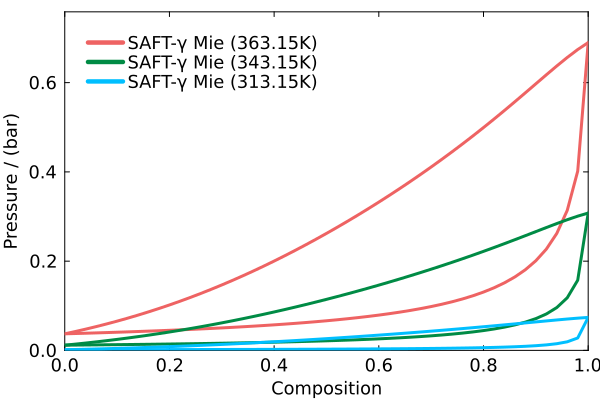

In [6]:
iter = 50
T = [363.15; 343.15; 313.15]  
xlims = (0, 1)
plt = vle_binary_plotting_function(iter, model_mix, T, xlims)

In [7]:
#savefig(plt, "MEA_H2O_Mix_Bubble+Dew_Isotherms")

"c:\\Users\\fjm21\\OneDrive - Imperial College London\\Julia Scripts\\Week 4\\MEA_H2O_Mix_Bubble+Dew_Isotherms.png"

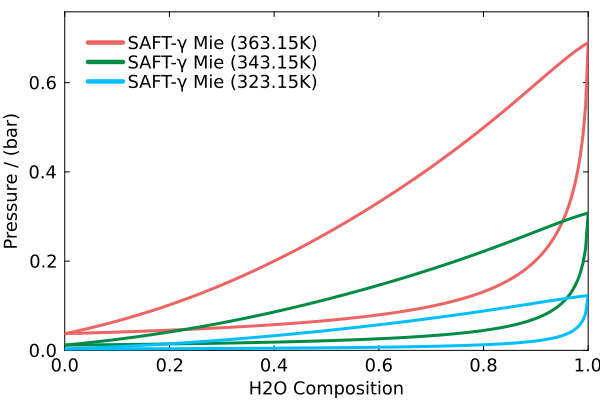

In [39]:
plt

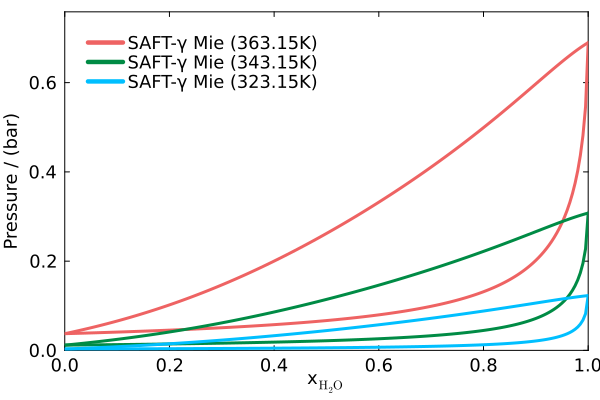

In [40]:
xlabel!(plt, "x"*L"\mathrm{_{H_2O}}")
#xlabel!(plt, "x"*L"\mathrm{_{H_2O}}"*" Composition")

In [41]:
exp_323 = CSV.read("MEA_H2O_323.15.csv",
               header=[1, 2, 3],
               DataFrame);

exp_343 = CSV.read("MEA_H2O_343.15.csv",
               header=[1, 2, 3],
               DataFrame);

exp_363 = CSV.read("MEA_H2O_363.15.csv",
               header=[1, 2, 3],
               DataFrame);

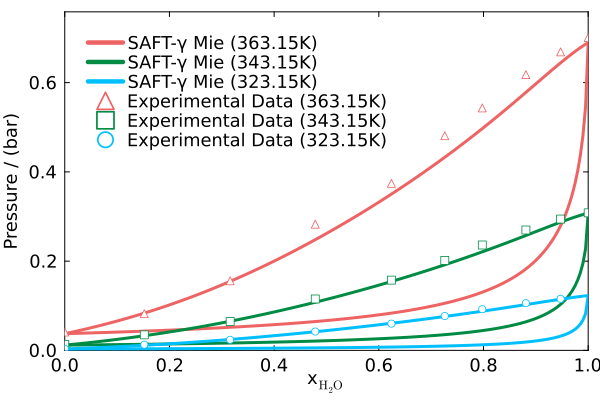

In [42]:

plot!(plt, exp_363[:, 2], exp_363[:, 1]./1e5,
        seriestype = :scatter, 
        color = "white", 
        markerstrokecolor = "indianred2",
        marker = :utriangle,
        line = (:scatter, 3), 
        label = "Experimental Data (363.15K)")


plot!(plt, exp_343[:, 2], exp_343[:, 1]./1e5,
        seriestype = :scatter, 
        color = "white", 
        markerstrokecolor = "springgreen4",
        marker = :square,
        line = (:scatter, 3), 
        label = "Experimental Data (343.15K)")

plot!(plt, exp_323[:, 2], exp_323[:, 1]./1e5,
        seriestype = :scatter, 
        color = "white", 
        markerstrokecolor = "deepskyblue1",
        marker = :circle,
        line = (:scatter, 3), 
        label = "Experimental Data (323.15K)")





In [43]:
savefig(plt, "MEA_H2O_Mix_Bubble+Dew_Isotherms_expdata")

"c:\\Users\\fjm21\\OneDrive - Imperial College London\\Julia Scripts\\Week 5\\MEA_H2O_Mix_Bubble+Dew_Isotherms_expdata.png"